### Objetivos deste projeto

- Apresentar duas formas de treinamento de um modelo de Regressão Linear
    - Closed-form (em outras palavra, há uma equação matemática que calcula o valor)
    - Otimização iterativa (Gradiente Descendente)
- Regressão Polinomial
- Técnicas de Regularização e Curvas de Aprendizado
- Regressão Logística
- Regressão Softmax

### Regressão Linear

A equação da regressão linear é representada por:

$ Y = \beta_0 + \beta_1 X + \epsilon $

Onde:
- $ Y $ é a variável dependente (ou resposta)
- $ X $ é a variável independente (ou preditora)
- $ \beta_0 $ é o coeficiente de interceptação (ou constante)
- $ \beta_1 $ é o coeficiente angular (ou coeficiente da variável independente)
- $ \epsilon $ é o erro aleatório

### Mean Square Error (MSE)

O Mean Square Error (MSE) é a função de custo do modelo de Regressão Linear, o treinamento do modelo ocorre com a diminuição do MSE. calculado pela seguinte equação: 
 
$ MSE = \frac{1}{n} \Sigma_{i=1}^n({Y_{i}}-\hat{Y_{i}})^2 $ 

Onde:

- $ MSE $ é o Mean Square Error (Erro Quadrático Médio)
- $ n $ é o número de observações
- $ Y_{i} $  é o valor observado da variável dependente para a i-ésima observação
- $ \hat{Y_{i}} $ é o valor previsto da variável dependente para a i-ésima observação

### Equação Normal

- A equação normal é uma solução fechada (Closed-form) usada para encontrar o valor de `θ` que minimiza a função de custo. Outra maneira de descrever a equação normal é como um algoritmo de `um passo` usado para encontrar analiticamente os coeficientes que minimizam a função de perda (Loss Function).
- A Equação Normal é uma abordagem analítica à Regressão Linear com uma Função de Custo Mínimo Quadrado (Least Square Cost Function). Podemos usar a Equação Normal para calcular diretamente os parâmetros de um modelo que minimiza a soma da diferença quadrada entre o termo real e o termo previsto. Este método é bastante útil quando o conjunto de dados é pequeno. No entanto, com um grande conjunto de dados, pode não ser possível fornecer o melhor parâmetro do modelo.

#### Fórmula de Equação Normal

A fórmula da Equação Normal é representada matematicamente como:

$ \theta = (X^T X)^{-1} X^T y $

onde:
- $\theta$ é o vetor de parâmetros da regressão,
- $X$ é a matriz de características, onde cada linha representa uma observação e cada coluna representa uma característica,
- $y$ é o vetor de valores alvo.

Esta fórmula nos dá os valores ideais dos parâmetros $\theta$ que minimizam a soma dos quadrados dos resíduos.

Esta fórmula pode ser usada para calcular os parâmetros da regressão linear quando se tem um conjunto de dados $X$ e $y$.

#### Complexidade
- A complexidade do treinamento do algoritmo aumenta à medida que aumenta o número de instâncias e características, isso torna inviável para bases de dados grandes.
- As predições tem complexidade linear.

In [3]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [13]:
# gera números entre 0 e 2 de uma distribuição normal
X = 2 * np.random.rand(100, 1)

# representando a Equação da Reta
y = 4 + 3 * X + np.random.randn(100, 1)

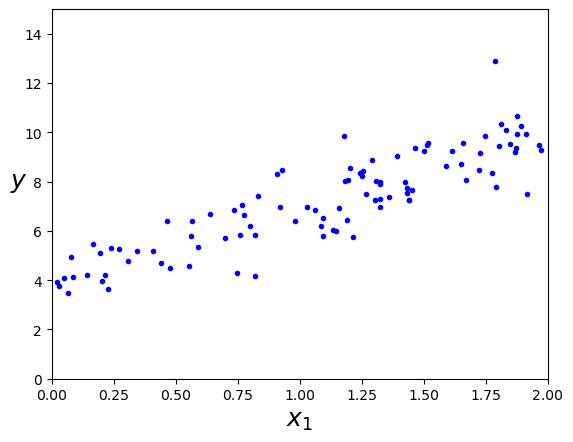

In [15]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [17]:
# adiciona 1 (um) em cada instancia
X_b = np.c_[np.ones((100, 1)), X]  

# np.linalg.inv: calcula a matriz inversa
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [18]:
theta_best

array([[3.88446741],
       [3.03935335]])

In [25]:
# mostrando como fica a saida para o seguinte comando
np.ones((2, 1))

array([[1.],
       [1.]])

In [19]:
X_new = np.array([[0], [2]])
# adiciona 1 (um) em cada instancia
X_new_b = np.c_[np.ones((2, 1)), X_new] 
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.88446741],
       [9.96317411]])

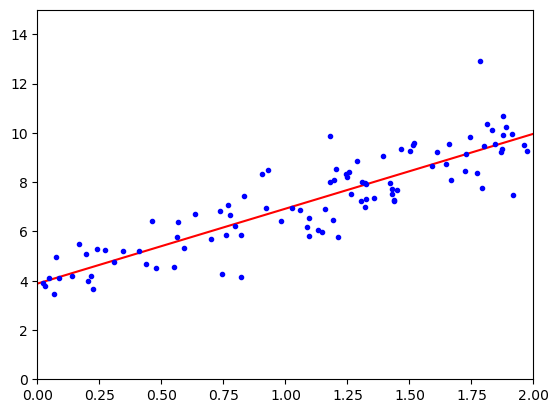

In [20]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

### Gradiente Descendente

- Gradiente é uma variação de grandeza, numa determinada direção, tendo em conta sua dimensão espacial
- Gradiente Descedente é um algoritmo de otimização usado para minimizar algumas funções movendo-se iterativamente na direção da descida mais íngreme, conforme definido pelo negativo do gradiente.
- O algoritmo funciona da seguinte forma:
    - O vetor de pesos $\theta$ é iniciado com valores aleatórios
    - É calculado o gradiente local da função erro em relação ao $\theta$
    - O $\theta$ é atualizado em direção ao Gradiente Descendente
    - A atualização de $\theta$ é um parâmetro do algortimo e é chamado de taxa de aprendizagem
        - Uma taxa de aprendizagem baixa pode tornar o algoritmo muito lento, enquanto uma taxa alta pode fazer passar do valor mínimo, às vezes aumentando o erro ao invés de diminuir
        - Nas duas situações pode impedir o algoritmo de encontrar um valor ótimo global
    - Ela ocorre forma iterativa e com pequenos passos
    - Com objetivo de minimizar a função custo (ex: MSE)
    - Até o algoritmo convergir pro mínimo
- É garantido que o Gradiente Descendente se aproximará arbitrariamente do mínimo global
- Quanto mais parâmetros o modelo tem, mais dimensões possui e mais difícil é a busca

### Gradiente Descendente Batch

- Para calcular o Gradiente Descendente é necessário calcular a `derivada parcial` do gradiente da função custo relacionado a cada parâmetro $\theta_{j}$
- É chamado de `Batch` porque usa todo o conjunto de treinamento a cada passo, poderia também ser chamado de `Full Gradient Descent`
- Como resultado, se torna terrivelmente lento à medida que aumenta a quantidade de instâncias
- Escala bem quando aumenta a quantidade de características
- Função para calcular a Vetor Gradiente da Função Custo


A função de custo Mean Squared Error (MSE) é dada por:


$ MSE(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})^2 $

Onde:
- $ m $ é o número de exemplos de treinamento,
- $ \theta $ é o vetor de parâmetros do modelo,
- $ x^{(i)} $ é o vetor de características da i-ésima observação,
- $ y^{(i)} $ é o valor alvo da i-ésima observação,
- $ h_{\theta}(x^{(i)}) $ é a predição do modelo para a i-ésima observação.

O vetor gradiente de $ MSE(\theta) $, $ \nabla MSE(\theta) $, em relação a $ \theta $ é dado por:

$ \nabla_{\theta} MSE(\theta) = \frac{1}{m} X^T(X\theta - y) $

Onde:
- $ X $ é a matriz de características,
- $ y $ é o vetor de valores alvo.

Esta equação do vetor gradiente nos dá a direção e a magnitude do maior aumento da função de custo em relação aos parâmetros do modelo $ \theta $. É frequentemente usado em algoritmos de otimização, como o Gradiente Descendente, para atualizar iterativamente os parâmetros do modelo até convergir para o mínimo global da função de custo.

In [27]:
eta = 0.1  # taxa de aprendizagem
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # inicialização aleatória

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) # cálculo do gradiente da função de custo Mean Squared Error (MSE)
    theta = theta - eta * gradients

In [28]:
theta

array([[3.88446741],
       [3.03935335]])

> Mesma $\theta$ encontrado pelo Equação Normal


In [31]:
# Calculando o Y
X_new_b.dot(theta)

array([[3.88446741],
       [9.96317411]])

In [32]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

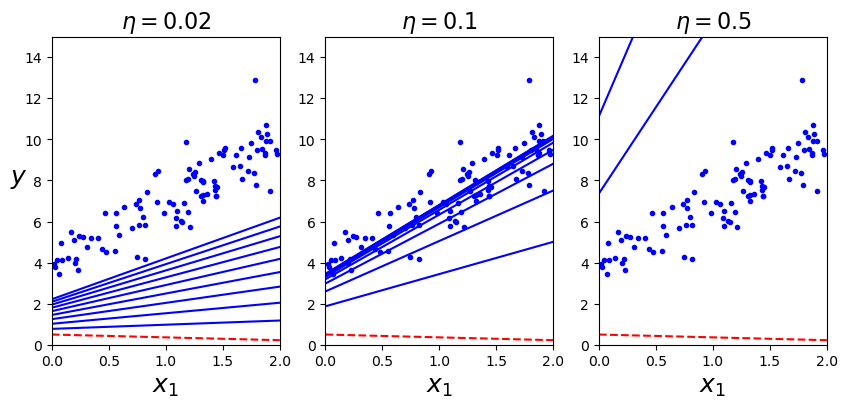

In [34]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

#### Anotação:

- Observa-se que quando a taxa de aprendizagem é muito pequena, pode levar mais tempo para chegar no ótimo global
- Quando a taxa de aprendizagem é muito grande, o algoritmo diverge, saltando cada vez mais distante da solução
- Usa sugestão é iniciar com o iniciar com uma grande quantidade de iterações e configurar  para o algoritmo parar quando o vetor gradiente se tornar muito pequeno, essa configuração é chamada de `tolerance`, isso acontece quando o algoritmo quando alcança o mínimo

### Gradiente Descendente Estocástico

- Utiliza uma instância de exemplo para calcular o gradiente baseado apenas nesta instância
- Obviamente isso torna o algoritmo muito mais rápido
- Devido a natureza deste algoritmo, ele é muito menos `regular` que o `Batch`
- Como o a função custo sobe e desce a cada iteração, a função custo diminui considerando a média
- Dificilmente a função custo se estabiliza, ao final, os parâmetros são bons, não são ótimo
- Como a função custo é irregular, este algoritmo permite encontrar o ótimo global com mais chances que o `Batch`
- A Aleatoriedade que este algoritmo tem permite escapar de ótimos locais, porém pode nunca encontar o mínimo, uma estratégia para lidar com isso é diminuir a taxa de aprendizado gradualmente

### Gradiente Descendente Mini-batch

- Utiliza um pequeno conjunto de instâncias para calcular o gradiente

### Regressão Polinomial

- Adequada para dados mais complexos que uma linha reta
- É possível aplicar um modelo linear para dados não lineares
- Modo 1:
    - incluir potências para cada característica como uma nova característica
    - isso é chamado de `Regressão Polinomial`
 


#### Exemplo

In [2]:
import numpy as np
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

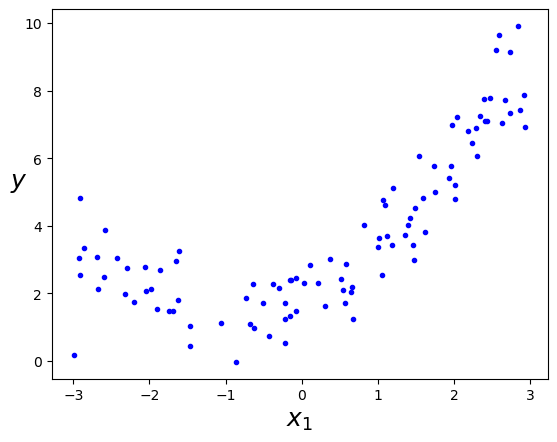

In [5]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

- Incluindo uma nova característica(feature) nos dados de treinamento

In [12]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print('Dado de treinamento original: ',X[0])
print('Dado de treinamento com a nova feature, potência da primeira: ', X_poly[0])

Dado de treinamento original:  [0.6546088]
Dado de treinamento com a nova feature, potência da primeira:  [0.6546088  0.42851268]


- `X_poly` é a nova base de treinamento

In [14]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.95147109]), array([[0.98074303, 0.47992851]]))

- Calculando o `Y` para cada `X` para gerar o gráfico

In [17]:
X_fit = np.linspace(X.min(), X.max(), 100)
X_fit_poly = poly_features.transform(X_fit.reshape(-1, 1))
y_fit = lin_reg.predict(X_fit_poly)

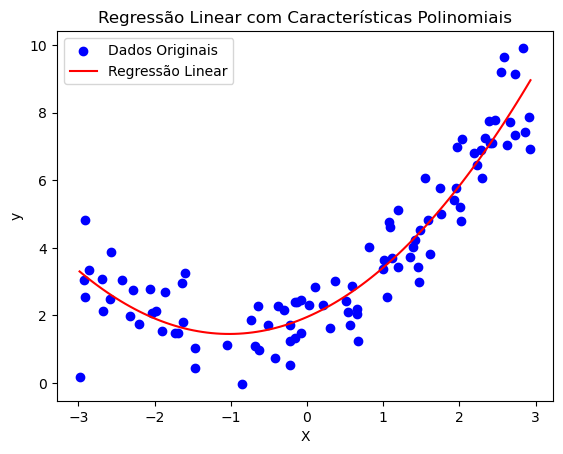

In [18]:
# Plotando os dados originais
plt.scatter(X, y, color='blue', label='Dados Originais')

# Plotando a linha de regressão ajustada
plt.plot(X_fit, y_fit, color='red', label='Regressão Linear')

# Adicionando rótulos e título
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regressão Linear com Características Polinomiais')
plt.legend()
plt.show()

### Curvas de aprendizado

- Precisamos gerar um modelo que consiga generalizar
- Se criarmos um modelo polinomial de alto grau corremos o risco de gerar um `overfitting` com os dados de treinamento
- O `overfitting` pode ser identificado quando nosso modelo possui um bom desempenho nos dados de treinamento porém um desempenho ruim nos dados de teste
- `Underfitting` quando nosso modelo performa mal em ambas bases, tanto de treinamento como de teste
- As `Curvas de aprendizado` de um modelo podem ser visualizadas graficamente com o modelo sendo avaliado com diferentes tamanho de bases de `treinamento`e verificando a métrica de avaliação do modelo

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)    
    plt.xlabel("Training set size", fontsize=14)  
    plt.ylabel("RMSE", fontsize=14)               

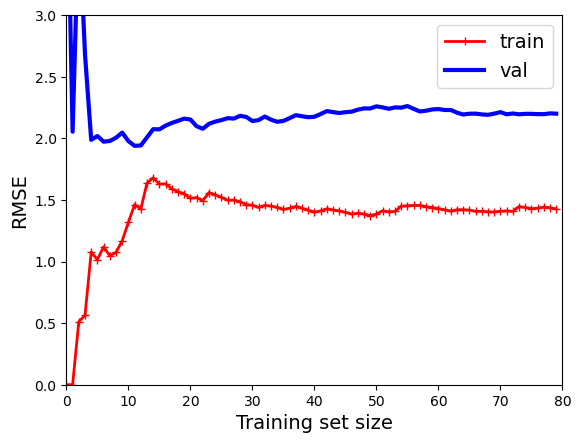

In [23]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         
plt.show()          

- No gráfico é possível identificar que com 1 e 2 amostras na base de treinamento o modelo se ajusta perfeitamente, porém possui um péssimo desempenho na base de teste, mostrando que o modelo está `overfitting`
- O aumento do tamanho da base de treinmento chega em um platô, a adição de novas instâncias não interfere no desempenho
- Em casos de `overfitting`, que a adição de novas instâncias não interferem mais no desempenho, pode ser um indicativo de usar um modelo mais complexo, ou incluir features melhores.

#### Utilizando o modelo de regressão polinomial

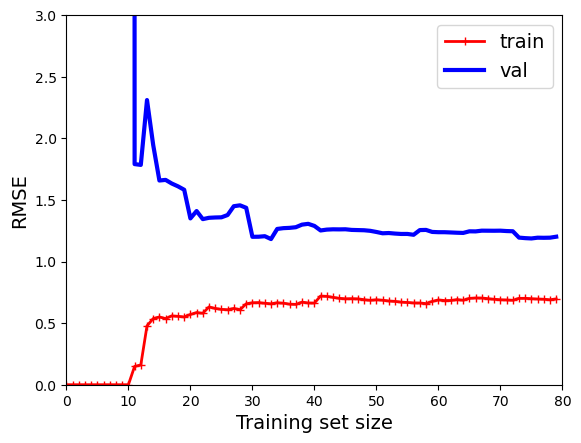

In [24]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])            
plt.show()                         

- O desempenho na base de treinamento é melhor que a Regressão Linear, esse gráfico é demonstra uma situação de `overfitting`
- Uma das formas de lidar com `overfitting` é incluir mais dados de treinamento até as curvas se alcançarem

### Modelos Lineares Regularizados

- Uma forma de reduzir o `overfitting` é regularizar (`regularize`) o modele, ou seja, restringi-lo
- Quanto menos graus de liberdade ele tiver, mais difícil será ele `overfit` a data
- Para regularizar um modelo linear pode ser feito através de restrições os pesos do modelo
- Para regularizar um modelo polinomial é possível restringir o grau do polinômio

#### Ridge Regression

- Também conhecida como Tikhonov Regularization
- Regularização para Regressão Linear
- Inclusão do termo de regularização na função custo:
    - $ \alpha \sum_{i=1}^{n} \theta_{i}^2 $

##### Nota

-  bastante comum que a função de custo utilizada durante o treinamento seja diferente da medida de desempenho utilizada nos testes
- Além da regularização, outra razão pela qual podem ser diferentes é que uma boa função de custo de treinamento deve ter derivadas de otimização, enquanto a medida de desempenho usada para teste deve estar o mais próxima possível do objetivo final
- Exemplo: classificadores são geralmente treinados usando a função de custo tal como a log loss mas são avaliados usando precisão/recall

- Equação da função custo Ridge Regression
    - $ J(\theta) = MSE(\theta) + \alpha (\frac{1}{2}) \sum_{i=1}^{n} \theta_{i}^2 $
    - O `bias` ($\theta_0$) não é regularizado
- É importante escalar os dados, Ridge Regularization é sensível a escala. Isso se aplica para a maioria das regularizações.

In [28]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [29]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [30]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.5507201]])

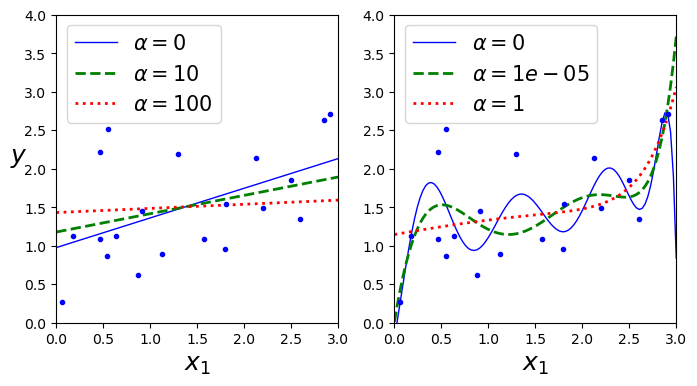

In [32]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

plt.show()

- No lado esquerdo tem as predições de modelos lineares com diferentes $\alpha$
- No lado direito os dados de treinamento foram expandidos para 10 grau do polinômio, em seguida, escalado e por fim usamos um modelo Ridge (Regressão Polinomial com Regularização Ridge)
- É possível identificar que quanto maior o $\alpha$, mais linear são nossas predições, dessa forma reduzindo a variância do modelo mas aumentando o bias

#### Lasso Regularization

- `Least Absolute Shrinkage and Selection Operator Regression`
- É outra versão da Regressão Linear Regularizada
- Adiciona um termo de regularização na função de custo
    - $ J(\theta) = MSE(\theta) + \alpha \sum_{i=1}^{n} \theta_{i}^2 $

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.802867703827432, tolerance: 0.0009294783355207351
  model = cd_fast.enet_coordinate_descent(


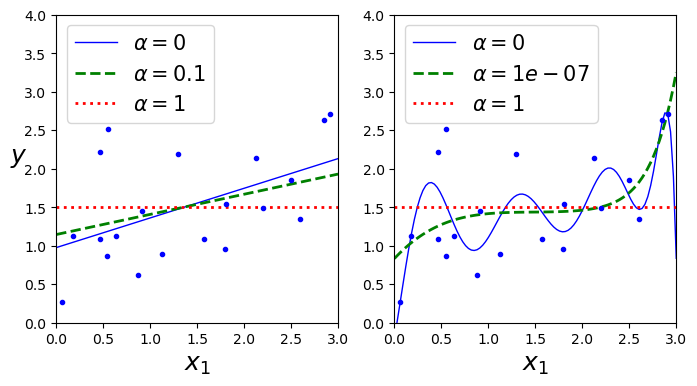

In [34]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

plt.show()